In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
label = {
     0 : 'Airplanes' ,
     1 : 'Cars ' ,
     2 : 'Birds' ,
     3 : 'Cats' ,
     4 : 'Deer' ,
     5 : 'Dogs' ,
     6 : 'Frogs' ,
     7 : 'Horses' ,
     8 : 'Ships' ,
     9 : 'Trucks' 
}

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 29s 0us/step


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Cars 


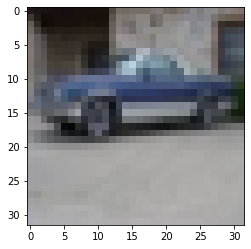

In [11]:
# 시각화
idx = 10000
plt.imshow(X_train[idx])
print(label[y_train[idx][0]])

In [19]:
index = np.random.randint(0, len(X_train))
index

404

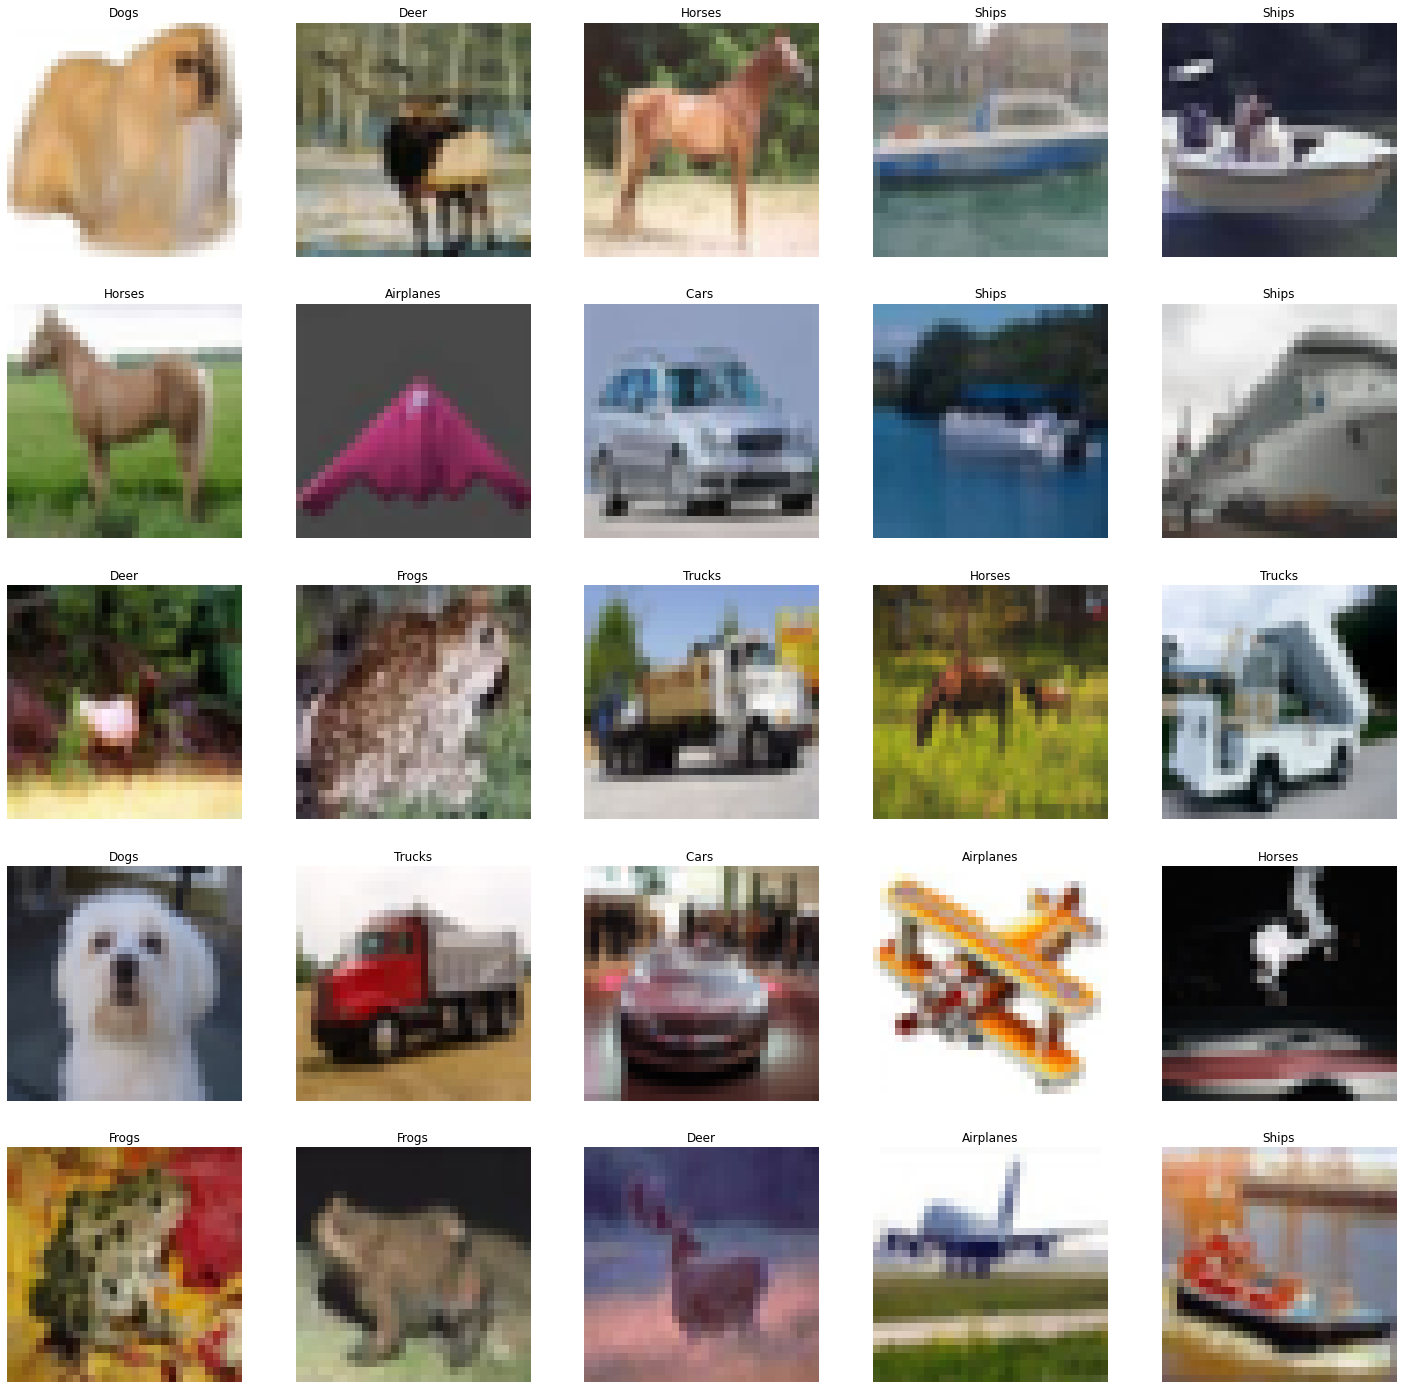

In [21]:
X_size = 5
Y_size = 5
fig, axes = plt.subplots(X_size, Y_size, figsize = (25,25))
axes = axes.ravel()

for i in range(len(axes)):
  index = np.random.randint(0, len(X_train))
  axes[i].imshow(X_train[index])
  axes[i].set_title(label[y_train[index][0]])
  axes[i].axis('off')

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
y_train = tf.keras.utils.to_categorical(y_train, 10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
y_train.shape

(50000, 10)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

In [30]:
model.compile(
    loss = 'categorical_crossentropy',
     optimizer =tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
                                                         metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 30, shuffle = True)

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

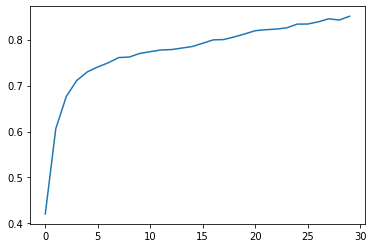

In [36]:
plt.plot(range(len(history.history['accuracy'])) ,history.history['accuracy'])

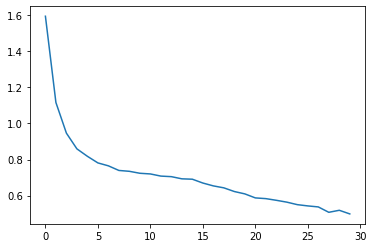

In [37]:
plt.plot(range(len(history.history['loss'])) ,history.history['loss'])

In [42]:
y_test.shape

(10000, 10)

In [41]:
y_test = tf.keras.utils.to_categorical(y_test, 10)
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8365 - accuracy: 0.7927


[0.8364784121513367, 0.7926999926567078]

In [44]:
# predict
prediction  = model.predict(X_test)
print(prediction.shape)
prediction

313/313 [==============================] - 1s 2ms/step
(10000, 10)


array([[9.0575422e-04, 4.5922206e-05, 3.8013834e-04, ..., 7.5680000e-05,
        4.9562368e-04, 2.2621128e-04],
       [1.8144102e-04, 3.9599403e-03, 2.5006364e-13, ..., 1.0608393e-17,
        9.9585658e-01, 1.9760089e-06],
       [3.4149599e-04, 1.7428815e-03, 1.9772223e-08, ..., 1.8292998e-10,
        9.9786913e-01, 4.6342153e-05],
       ...,
       [5.9147101e-07, 1.3195934e-08, 1.4947230e-03, ..., 2.8944490e-04,
        5.2215626e-08, 7.9232976e-09],
       [1.2664879e-03, 9.9862885e-01, 8.6744905e-07, ..., 6.8632017e-10,
        7.7516044e-05, 2.5487883e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [45]:
prediction[-1]

array([9.0575422e-04, 4.5922206e-05, 3.8013834e-04, 7.3630387e-01,
       6.7612063e-04, 2.6041862e-01, 4.7206946e-04, 7.5680000e-05,
       4.9562368e-04, 2.2621128e-04], dtype=float32)

In [53]:
test_label = y_test.argmax(axis = 1) # 실제

In [52]:
prediction_argmax = prediction.argmax(axis = 1) # 예측

In [55]:
label[test_label[0]]

'Cats'

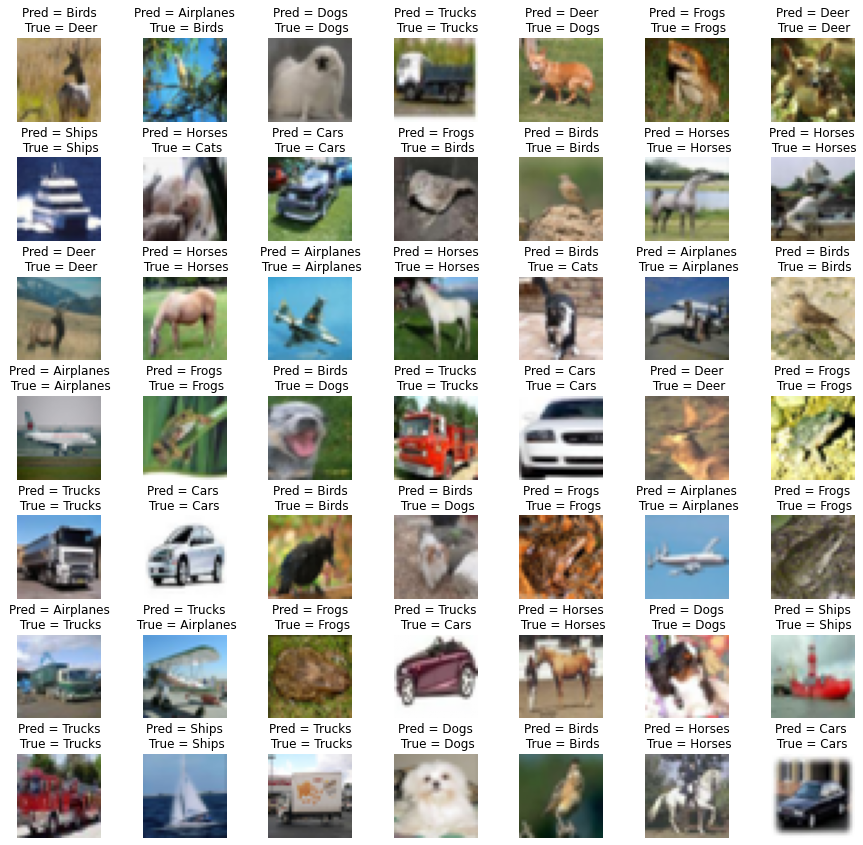

In [60]:
X_size = 7
Y_size = 7
fig, axes = plt.subplots(X_size, Y_size, figsize = (15,15))
axes = axes.ravel()

for i in range(len(axes)):
  index = np.random.randint(0, len(test_label))
  axes[i].imshow(X_test[index])
  predictioin_result = label[prediction_argmax[index]]
  real = label[test_label[index]]
  axes[i].set_title(f'Pred = {predictioin_result}\n True = {real}')
  axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

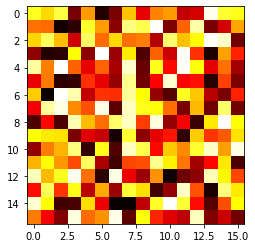

In [63]:
a.shape

(16, 16)

In [ ]:
test_label 
prediction_argmax 

In [70]:
prediction_argmax

array([3, 8, 8, ..., 5, 1, 7])

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, prediction_argmax)

In [83]:
label.values()

dict_values(['Airplanes', 'Cars ', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks'])

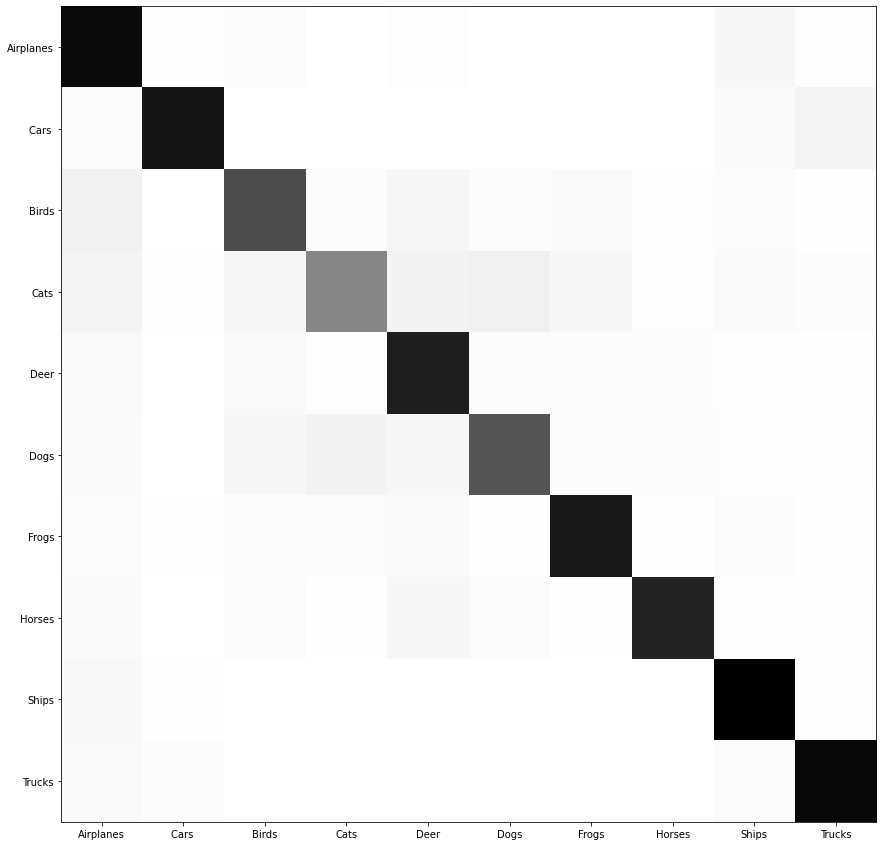

In [88]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 1, figsize = (15,15))
plt.imshow(cm, cmap='Greys', interpolation='nearest')
plt.xticks(np.arange(0, len(label.values())))
plt.yticks(np.arange(0, len(label.values())))
axes.set_xticklabels(label.values())
axes.set_yticklabels(label.values())
plt.show()

In [90]:
model.save('./models') # model save

# Data Augmentation

In [91]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [93]:
X_train = X_train/255
X_test = X_test/255

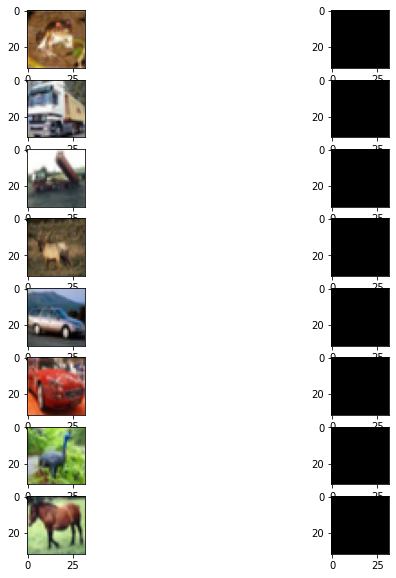

In [120]:
# sample
sample_data = X_train[:8]
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 90)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip = True)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range = 0.5)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range = (0.01,1))
datagen.fit(sample_data)

fig, axes = plt.subplots(8, 2, figsize = (10, 10))
datagen_img = datagen.flow(sample_data, batch_size = 1, shuffle = False)

for i in range(len(sample_data)):
  batch = datagen_img.next()[0]
  axes[i][0].imshow(sample_data[i])
  axes[i][1].imshow(batch)

In [121]:
# 모델링
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 90,
                                                          vertical_flip = True,
                                                          height_shift_range = 0.5)
datagen.fit(X_train)

In [122]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [125]:
model.compile(
    loss = 'categorical_crossentropy',
     optimizer =tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
                                                         metrics = ['accuracy'])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 35s 22ms/step - loss: 2.0579 - accuracy: 0.2271
Epoch 2/30
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8722 - accuracy: 0.3142
Epoch 3/30
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7782 - accuracy: 0.3548
Epoch 4/30
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7180 - accuracy: 0.3810
Epoch 5/30
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6770 - accuracy: 0.3994
Epoch 6/30
1563/1563 [==============================] - 32s 21ms/step - loss: 1.6571 - accuracy: 0.4118
Epoch 7/30
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6459 - accuracy: 0.4103
Epoch 8/30
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6287 - accuracy: 0.4257
Epoch 9/30
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6138 - accuracy: 0.4277
Epoch 10/30
1563/1563 [==============================] - 33s 21m

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')